In [2]:
import numpy as np
from scipy import optimize
from numpy import ones, zeros, column_stack, exp, dot, log, newaxis
from scipy.special import expit, logit


%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('natasy/data/ex2data1.txt', delimiter=',')
features = data[:,:2]
y = data[:,2]

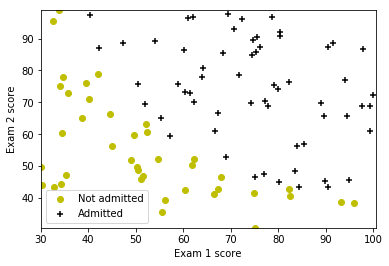

In [4]:
plt.scatter(features[y==0,0], features[y==0,1],color='y', marker='o', label='Not admitted')
plt.scatter(features[y==1,0], features[y==1,1], color='k', marker='+', label='Admitted')

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.autoscale(tight=True)
plt.legend(loc=3)
plt.show()

In [11]:
m, n = features.shape
features.shape

X = column_stack((ones((m, 1)), features))
initial_theta = zeros((n+1))



# this is the hypothsis function h(X)
def sigmoid(z): 
    return 1/(1+exp(-z))

def costFunction(initial_theta, X, y):
    # J = (-1/m) * sum(     y .* log(sigmoid(X*theta))     +     (1-y) .* log(1 - sigmoid(X*theta))     );
    h_of_X = sigmoid(dot(X, initial_theta[:,newaxis]))
    J = np.sum(-y[:, newaxis] * log(h_of_X) - 
                  (1-y[:, newaxis])*log(1-h_of_X))/X.shape[0]
    return J

def gradient(theta, X, y):
    # grad = (1/m) *  ( (sigmoid(X*theta) - y)'  * X );
    h_of_X = sigmoid(dot(X, theta[:,newaxis]))    
    grad = dot(X.T,h_of_X-y[:, newaxis])/X.shape[0]
    #print grad.flatten()

    return grad.flatten()

gradient(initial_theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [36]:
m, n = features.shape
features.shape

X = column_stack((ones((m, 1)), features))
initial_theta = zeros((n+1))

def sigmoid(Z):
    # https://docs.scipy.org/doc/scipy/reference/generated /scipy.special.expit.html
    # return 1 / (1 + np.exp(-Z))
    return expit(np.clip(Z, -709, 36.73))

def sigmoid_prime(A):
    return A * (1 - A)

def binary_cross_entropy_loss(y, a):
    return -(y * np.log(a) + (1 - y) * np.log(1 - a))

def binary_cross_entropy_loss_prime(y, a):
    return -y / a + (1 - y) / (1 - a)


def gradient(theta, X, y):
    # grad = (1/m) *  ( (sigmoid(X*theta) - y)'  * X );
    A = sigmoid(dot(X, theta[:,newaxis]))    
    sig_prime = sigmoid_prime(A)
    xe_prime = binary_cross_entropy_loss_prime(y[:, newaxis], A)
    
    # grad = dot(X.T,A-y[:, newaxis])/X.shape[0]
    print(sig_prime.shape)
    print(xe_prime.shape)
    grad = dot(X.T, sig_prime * xe_prime)/m
    return grad.flatten()

#gradient(initial_theta, X, y)
A = sigmoid(dot(X, initial_theta[:,newaxis]))
dLdA = binary_cross_entropy_loss_prime(y[:,newaxis], A)
dAdZ = sigmoid_prime(A)
dLdZ = dLdA * dAdZ
dZdW = X
dLdW = dot(dZdW.T, dLdZ)/m
print(dLdW)

[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


In [51]:
data = np.loadtxt('natasy/data/ex2data1.txt', delimiter=',')
features = data[:, :2]
y = data[:, 2:]



def multinomial_cross_entropy_loss_prime(y, a):
    return -np.sum(y/a)

def softmax(Z):
    Z_exp = np.exp(Z)
    return Z_exp / np.sum(Z_exp, axis=0)

def stable_softmax(Z):
    shift_Z = Z - np.max(Z, axis=0)
    Z_exp = np.exp(shift_Z)
    return Z_exp / np.sum(Z_exp, axis=0)

def softmax_prime(A):
    b = np.zeros((A.shape[0], A.shape[0], A.shape[1]))
    diag = np.arange(A.shape[0])
    b[diag, diag, :] = A

    SM = A.reshape((-1, 1))
    jac = np.diag(A) - np.dot(SM, SM.T)
    return jac

def _weights_initialization(n_out, n_in):
    W = np.random.randn(n_out, n_in) * 0.01
    b = np.zeros((n_out, 1))
    return W, b

In [69]:
from sklearn.datasets import load_iris
dataset = load_iris()

X = dataset.data.T

y = np.zeros((dataset.target_names.size, dataset.target.size))
y[dataset.target, np.arange(dataset.target.size)] = 1  # (5000, 10)

dir(dataset)
W, b = _weights_initialization(4, 3)

Z = np.dot(W.T, X)
S = stable_softmax(Z)

In [73]:
def multinomial_cross_entropy_loss_prime(y, a):
    return -np.sum(y/a) 

multinomial_cross_entropy_loss_prime(y, S)

-460.987108265649

In [130]:
print(S.shape)
s = S[:,0:1]

(3, 150)


In [153]:
idn = np.eye(s.size)
print(s)
print()
# print(np.diag(s.flatten()))
print()
print(idn-s)
print()

a1 = idn-s
a2 = np.array([[0,1,2]])

np.multiply(s, a1)

[[0.3387381 ]
 [0.35317122]
 [0.30809069]]


[[ 0.6612619  -0.3387381  -0.3387381 ]
 [-0.35317122  0.64682878 -0.35317122]
 [-0.30809069 -0.30809069  0.69190931]]



array([[ 0.2239946 , -0.1147435 , -0.1147435 ],
       [-0.12472991,  0.22844131, -0.12472991],
       [-0.09491987, -0.09491987,  0.21317082]])

In [189]:
def softmax(z):
    """Computes softmax function.
    z: array of input values.
    Returns an array of outputs with the same shape as z."""
    # For numerical stability: make the maximum of z's to be 0.
    shiftz = z - np.max(z)
    exps = np.exp(shiftz)
    return exps / np.sum(exps)

def softmax_gradient(S):
    """Computes the gradient of the softmax function.
    
    z: (T, 1) array of input values where the gradient is computed. T is the
       number of output classes.
    Returns D (T, T) the Jacobian matrix of softmax(z) at the given z. D[i, j]
    is DjSi - the partial derivative of Si w.r.t. input j.
    """
    # -SjSi can be computed using an outer product between Sz and itself. Then
    # we add back Si for the i=j cases by adding a diagonal matrix with the
    # values of Si on its diagonal.
    dAdZ_struct = np.zeros((S.shape[0], S.shape[0], S.shape[1]))
    diag_indecies = np.arange(S.shape[0])
    dAdZ_struct[diag_indecies, diag_indecies, :] = S

    # D = -np.outer(S, S) + np.diag(S.flatten())
    dAdZ = dAdZ_struct - S[:,None,:]*S
    return dAdZ

softmax_gradient(S).shape

(3, 150)
(3, 3, 150)
(3, 3, 150)
(3, 3, 150)


(3, 3, 150)

In [111]:
M = np.array([[ 0.25891593,  0.07299478,  0.36586996],
 [ 0.30851087,  0.37131459,  0.16274825],
 [ 0.71061831,  0.67718718,  0.09562581],
 [ 0.71588836,  0.76772047,  0.15476079],
 [ 0.92985142,  0.22263399,  0.88027331]])
M.shape

(5, 3)

In [128]:
b = np.zeros((M.shape[0], M.shape[1], M.shape[1]))
diag = np.arange(M.shape[1])
b[:, diag, diag] = np.array([[33, 66, 99], [22, 44, 88]])
b

ValueError: shape mismatch: value array of shape (2,3) could not be broadcast to indexing result of shape (3,5)

array([[[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]],

       [[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]],

       [[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]],

       [[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]],

       [[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]])